In [7]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score


In [8]:
dta = sm.datasets.fair.load_pandas().data


dta["affairs"] = (dta.affairs > 0).astype(int)
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [15]:
y, X = dmatrices('affairs ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)',
                    dta, return_type="dataframe")
X = X.rename(columns = {
    'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',

'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'}) 

X[:2]

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0


In [44]:
yn = np.ravel(y)
yn

array([1., 1., 1., ..., 0., 0., 0.])

In [20]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,1.000000


array([[<AxesSubplot: title={'center': 'rate_marriage'}>,
        <AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'yrs_married'}>],
       [<AxesSubplot: title={'center': 'children'}>,
        <AxesSubplot: title={'center': 'religious'}>,
        <AxesSubplot: title={'center': 'educ'}>],
       [<AxesSubplot: title={'center': 'occupation'}>,
        <AxesSubplot: title={'center': 'occupation_husb'}>,
        <AxesSubplot: title={'center': 'affairs'}>]], dtype=object)

<Figure size 2000x1800 with 0 Axes>

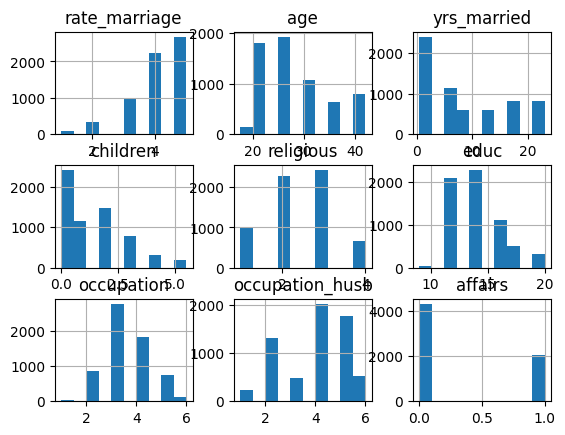

In [21]:
%matplotlib inline
plt.figure(figsize=(20,18))
dta.hist()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [25]:
logit = sm.Logit(y_train, X_train)

result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.539775
         Iterations 6


In [26]:
predictions = result.predict(X_test)
predictions

1205    0.934801
1939    0.655764
5399    0.217393
5439    0.187085
2240    0.452427
          ...   
5819    0.267027
3403    0.298715
2482    0.221869
2278    0.109588
4881    0.175410
Length: 1910, dtype: float64

In [27]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4456
Model:                          Logit   Df Residuals:                     4439
Method:                           MLE   Df Model:                           16
Date:                Wed, 09 Nov 2022   Pseudo R-squ.:                  0.1380
Time:                        15:01:24   Log-Likelihood:                -2405.2
converged:                       True   LL-Null:                       -2790.4
Covariance Type:            nonrobust   LLR p-value:                1.399e-153
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.9421      0.720      4.085      0.000       1.531       4.354
occ_2             0.8101      0.574      1.412      0.158      -0.314       1.935
occ_3             1.1186      0.567      1.973      0.049       0.007       2.230
occ_4             0.8928      0.568      1.571      0.116      -0.221       2.007
occ_5             1.4225      0.573      2.482      0.013       0.299       2.546
occ_6             1.4562      0.634      2.299      0.022       0.215       2.698
occ_husb_2        0.1038      0.221      0.471      0.638      -0.329       0.536
occ_husb_3        0.1953      0.240      0.813      0.416      -0.276       0.666
occ_husb_4        0.1240      0.214      0.579      0.563      -0.296       0.544
occ_husb_5        0.2022      0.216      0.937      0.349      -0.221       0.625
occ_husb_6        0.2842      0.239      1.191      0.234      -0.184       0.752
rate_marriage    -0.6979      0.038    -18.502      0.000      -0.772      -0.624
age              -0.0723      0.013     -5.748      0.000      -0.097      -0.048
yrs_married       0.1233      0.013      9.277      0.000       0.097       0.149
children         -0.0137      0.039     -0.355      0.722      -0.089       0.062
religious        -0.3689      0.042     -8.773      0.000      -0.451      -0.286
educ             -0.0187      0.021     -0.886      0.375      -0.060       0.023
=================================================================================
"""

In [28]:
dta.groupby('affairs').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
affairs,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559


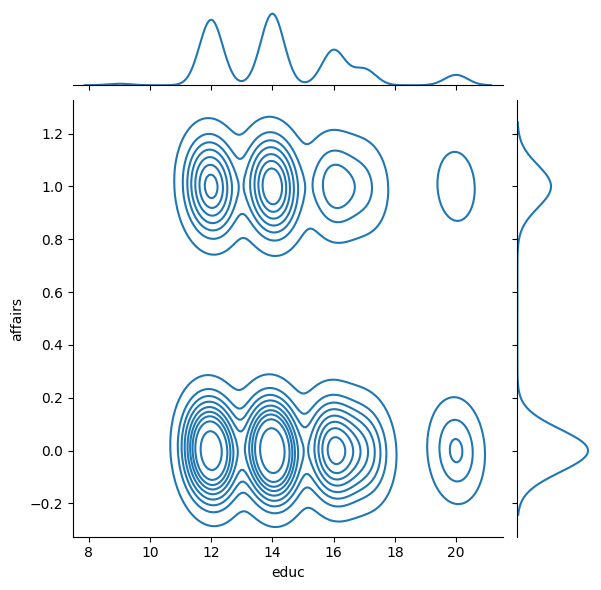

In [29]:
import seaborn as sns
sns.jointplot(x='educ', y='affairs', data=dta, kind='kde')

Text(0, 0.5, 'Frequency')

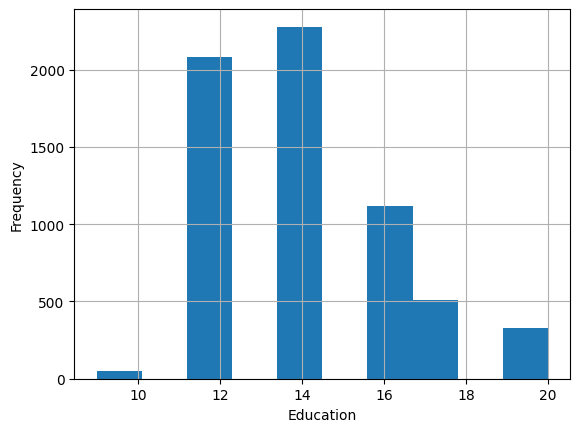

In [30]:
dta.educ.hist()
plt.xlabel('Education')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

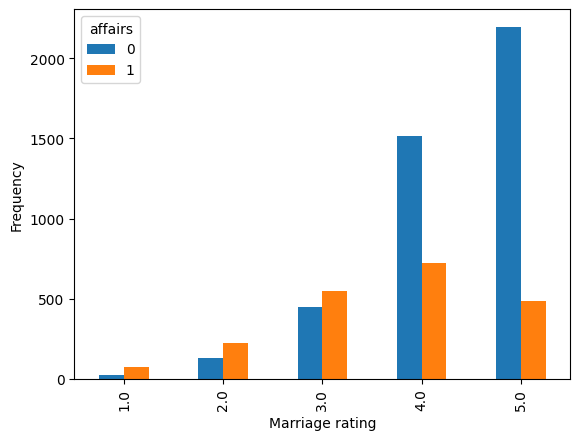

In [31]:
pd.crosstab(dta.rate_marriage, dta.affairs).plot(kind='bar')
plt.xlabel('Marriage rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

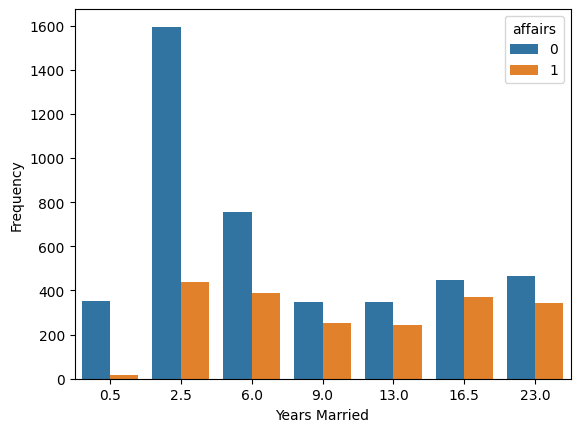

In [32]:
sns.countplot(x='yrs_married', data=dta, hue="affairs")
plt.xlabel('Years Married')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

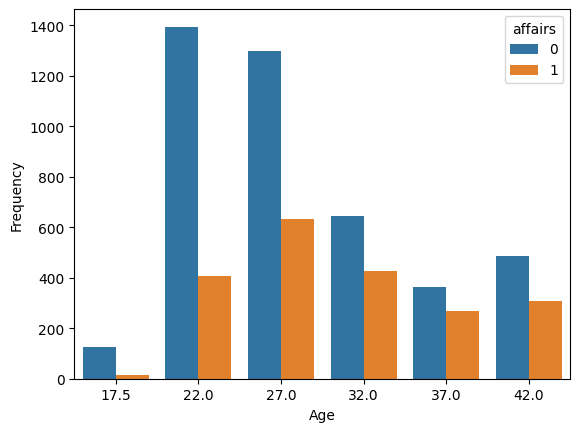

In [33]:
sns.countplot(x='age', data=dta, hue="affairs")
plt.xlabel('Age')
plt.ylabel('Frequency')

In [38]:
y = y.reshape(-1, 1)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, yn, test_size=0.3, random_state=2)
model = LogisticRegression(solver='lbfgs', max_iter=650)
model.fit(X_train, y_train)

LogisticRegression(max_iter=650)

In [49]:
model.score(X_train, y_train)

0.7300269299820467

In [51]:
pred = model.predict(X_test)
probs = model.predict_proba(X_test)

In [53]:
metrics.accuracy_score(y_test, pred)

0.7188481675392671

In [54]:
metrics.roc_auc_score(y_test, probs[:,1])

0.7424059753496999

<AxesSubplot: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

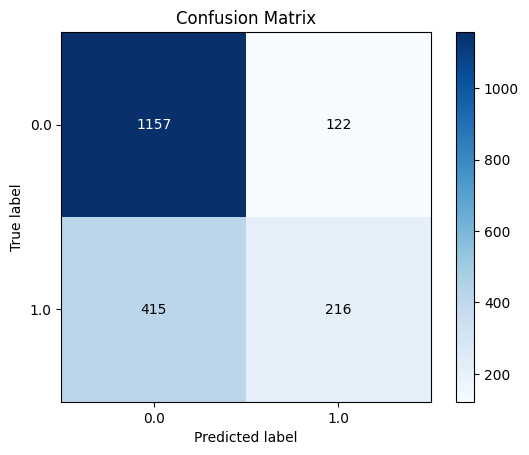

In [55]:
import scikitplot
scikitplot.metrics.plot_confusion_matrix(y_test, pred)

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

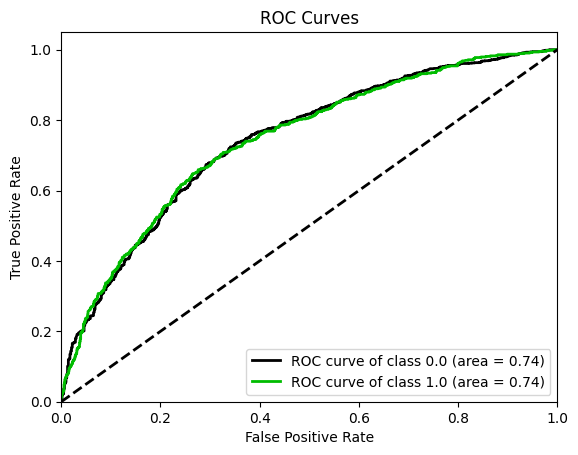

In [57]:
scikitplot.metrics.plot_roc_curve(y_test, probs, curves=['each_class'])

In [59]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.74      0.90      0.81      1279
         1.0       0.64      0.34      0.45       631

    accuracy                           0.72      1910
   macro avg       0.69      0.62      0.63      1910
weighted avg       0.70      0.72      0.69      1910



In [62]:
scores = cross_val_score(LogisticRegression(), X,y, scoring='accuracy', cv=10)
scores, scores.mean()

d:\Prathamesh\Code\Misc\venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Prathamesh\Code\Misc\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Prathamesh\Code\Misc\venv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

(array([0.72213501, 0.70015699, 0.73940345, 0.70486656, 0.71585557,
        0.72684458, 0.72798742, 0.70440252, 0.75314465, 0.75157233]),
 0.7246369084644018)

In [64]:
print(model.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 30, 10, 3, 4,16]]))) 
print('The predicted probability of an affair is 28%')

[[0.71255884 0.28744116]]
The predicted probability of an affair is 28%


d:\Prathamesh\Code\Misc\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
